In [4]:
 """
age -- age of a person
workclass -- A work class is a grouping of work
education -- Education of an individuals
maritalstatus -- Marital status of an individulas
occupation -- occupation of an individuals
relationship --
race -- Race of an Individual
sex -- Gender of an Individual
capitalgain -- profit received from the sale of an investment
capitalloss -- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week
native -- Native of an individual
Salary -- salary of an individual
"""

'\nage -- age of a person\nworkclass -- A work class is a grouping of work\neducation -- Education of an individuals\nmaritalstatus -- Marital status of an individulas\noccupation -- occupation of an individuals\nrelationship --\nrace -- Race of an Individual\nsex -- Gender of an Individual\ncapitalgain -- profit received from the sale of an investment\ncapitalloss -- A decrease in the value of a capital asset\nhoursperweek -- number of hours work per week\nnative -- Native of an individual\nSalary -- salary of an individual\n'

# 1 Importing Required Libraries

In [5]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,power_transform
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score,roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# 2.Data Ingestion

In [6]:
df= pd.read_csv("SalaryData_Train(1).csv")
df_test=pd.read_csv("SalaryData_Test(1).csv")

In [7]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [9]:
df.shape

(30161, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [12]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


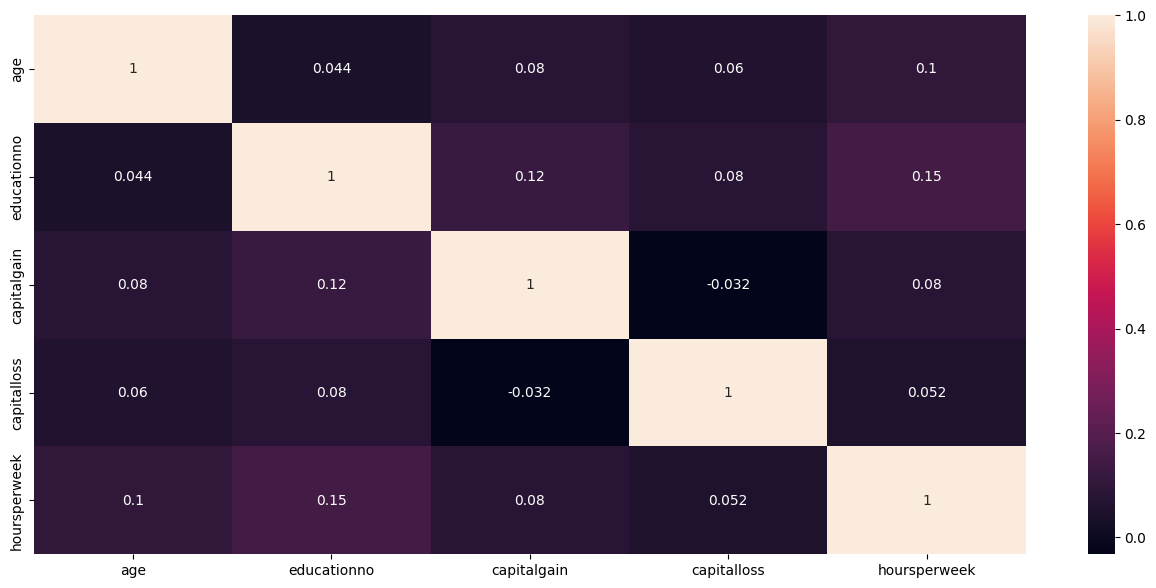

In [13]:
plt.figure(figsize = (16 , 7))
sns.heatmap(df.corr(), annot=True);

# 3 . Check countplot of income

<Axes: xlabel='Salary', ylabel='count'>

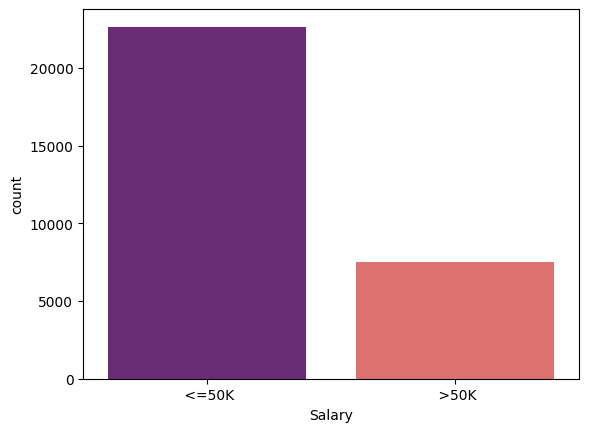

In [14]:
sns.countplot(x="Salary",data=df,palette = "magma")

# 4 .Observation

• A clear imbalance in the dataset as our target variable, income seems to have more people in
the dataset earning more than $50K.

In [15]:
df["Salary"].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

# 5 .EDA

# 5.1 seperate Categorical and Numerical Features

In [16]:
categorical_col = [fea for fea in df.columns if df[fea].dtype == 'O']
categorical_col

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [17]:
numerical_col=[fea for fea in df.columns if df[fea].dtype != 'O']
numerical_col

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

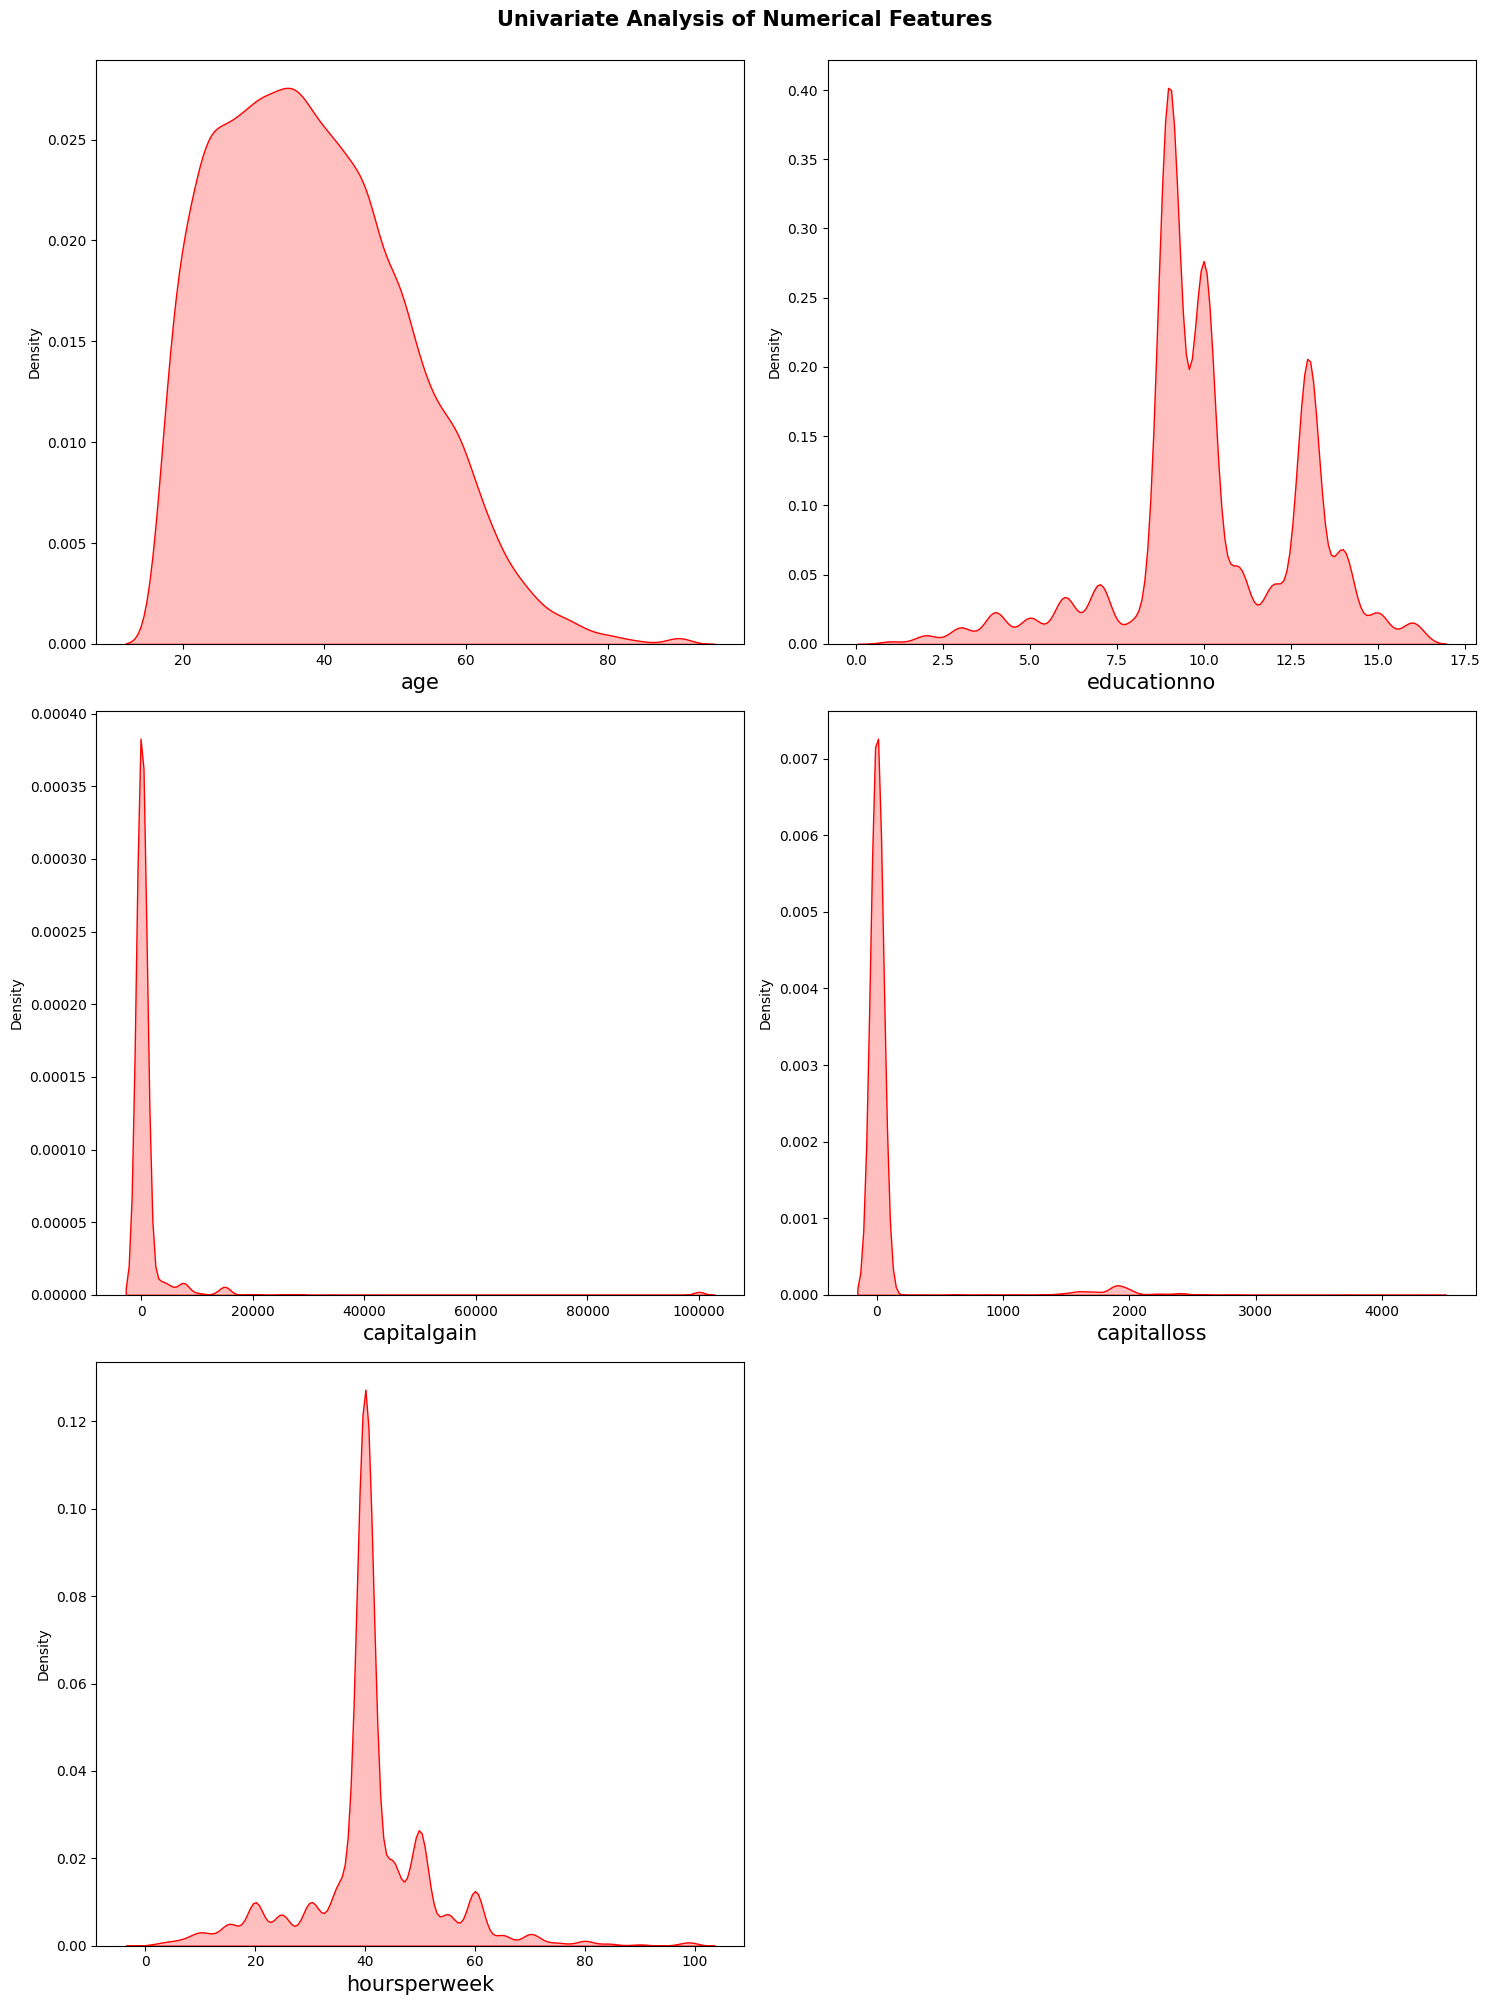

In [18]:
 plt.figure(figsize=(15,20), facecolor='white')
plt.suptitle('Univariate Analysis of Numerical Features',fontweight ="bold",fontsize=15,y = 1)
for i in range(0, len(numerical_col)):
    plt.subplot(3,2 , i+1)
    sns.kdeplot(x=df[numerical_col[i]],shade = True, color='r',data=df)
    plt.xlabel(numerical_col[i],fontsize = 15)
    plt.tight_layout()

1.Age is aprroximately normally distributed.
2.capital loss & capital gain are heavily right skewed.

# 6.  Check distribution and outliers together for numerical feature

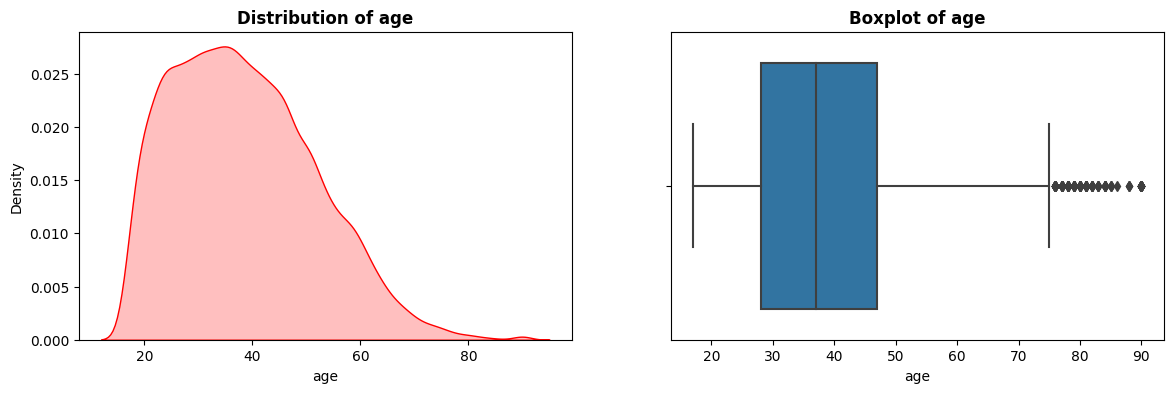

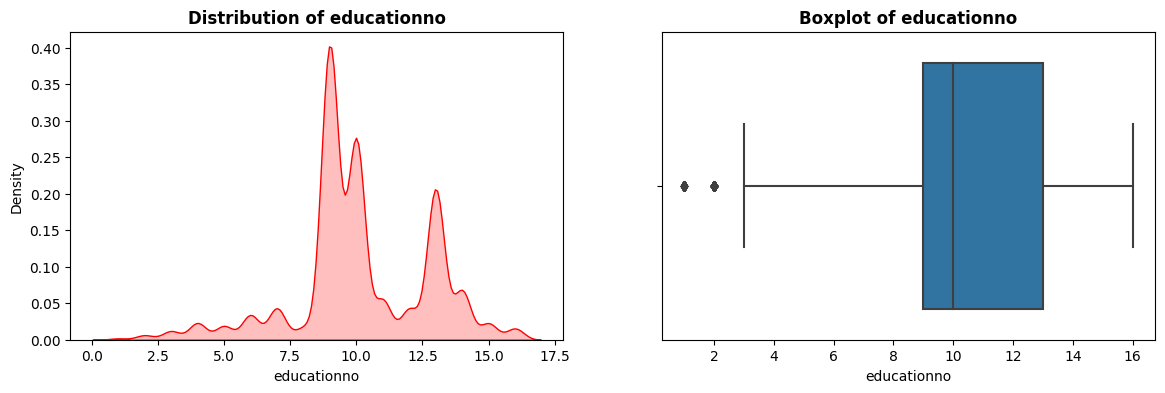

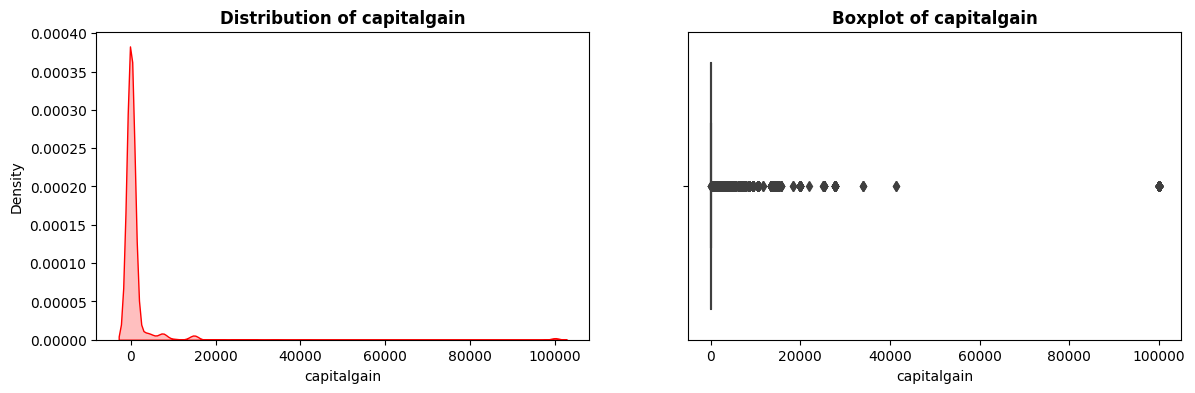

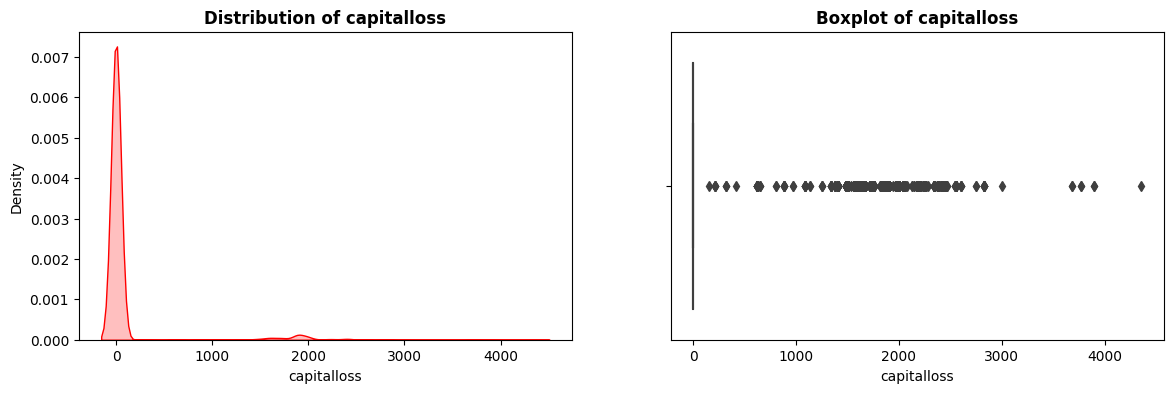

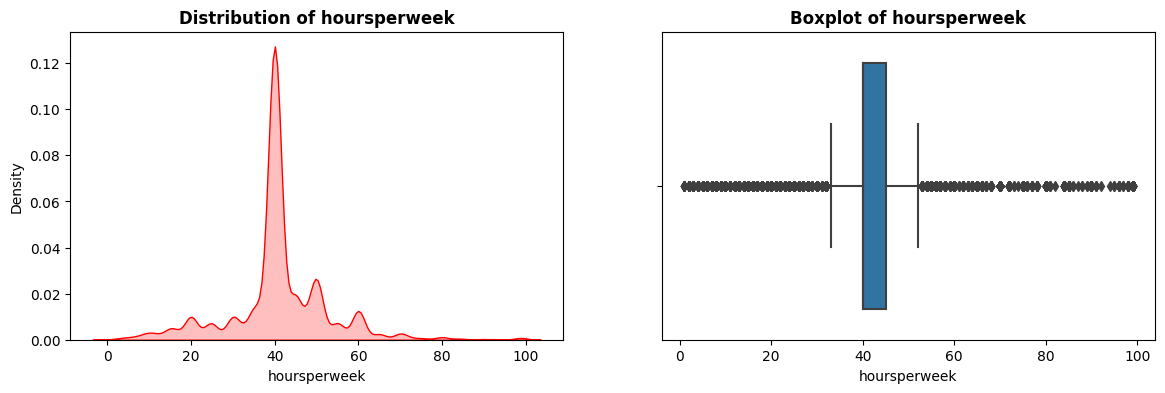

In [19]:
for fea in numerical_col:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.kdeplot(x=df[fea],shade = True, color='r',data=df)
    plt.title("Distribution of {}".format(fea),fontweight = 'bold' )
    plt.subplot(122)
    sns.boxplot(x= fea,data = df[numerical_col])
    plt.title("Boxplot of {}".format(fea),fontweight = 'bold' )
    plt.show()


# 7 . Bi-variate Analysis

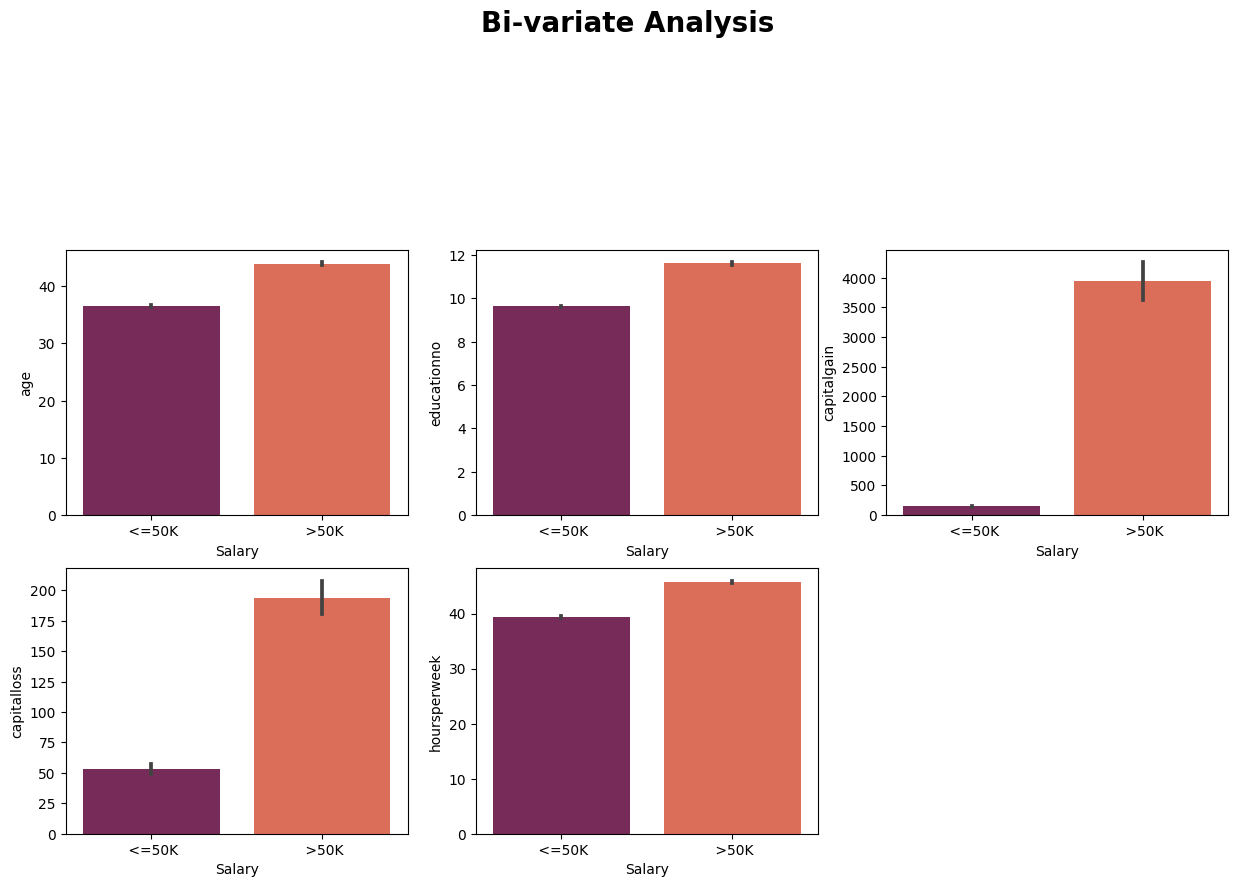

In [20]:
plt.figure(figsize=(15,20))
plt.suptitle('Bi-variate Analysis',fontsize=20,fontweight='bold',alpha=1, y=1)
for i in range(0,len(numerical_col)):
    plt.subplot(5,3,i+1)
    sns.barplot(y=numerical_col [i], x='Salary',data=df,palette="rocket")
    plt.tight_layout


# Observations

1.The bar plot above are bivariate plots 2.In terms of age, older the person, more is the probability
of income getting higher. 3.Capital gain and capital loss are more experienced by people having
higher income. 4.People having higher income are working more hours per week compare to people
with lower income

# 8. Visualize the categorical columns against the Target column:

In [21]:
categorical_col

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

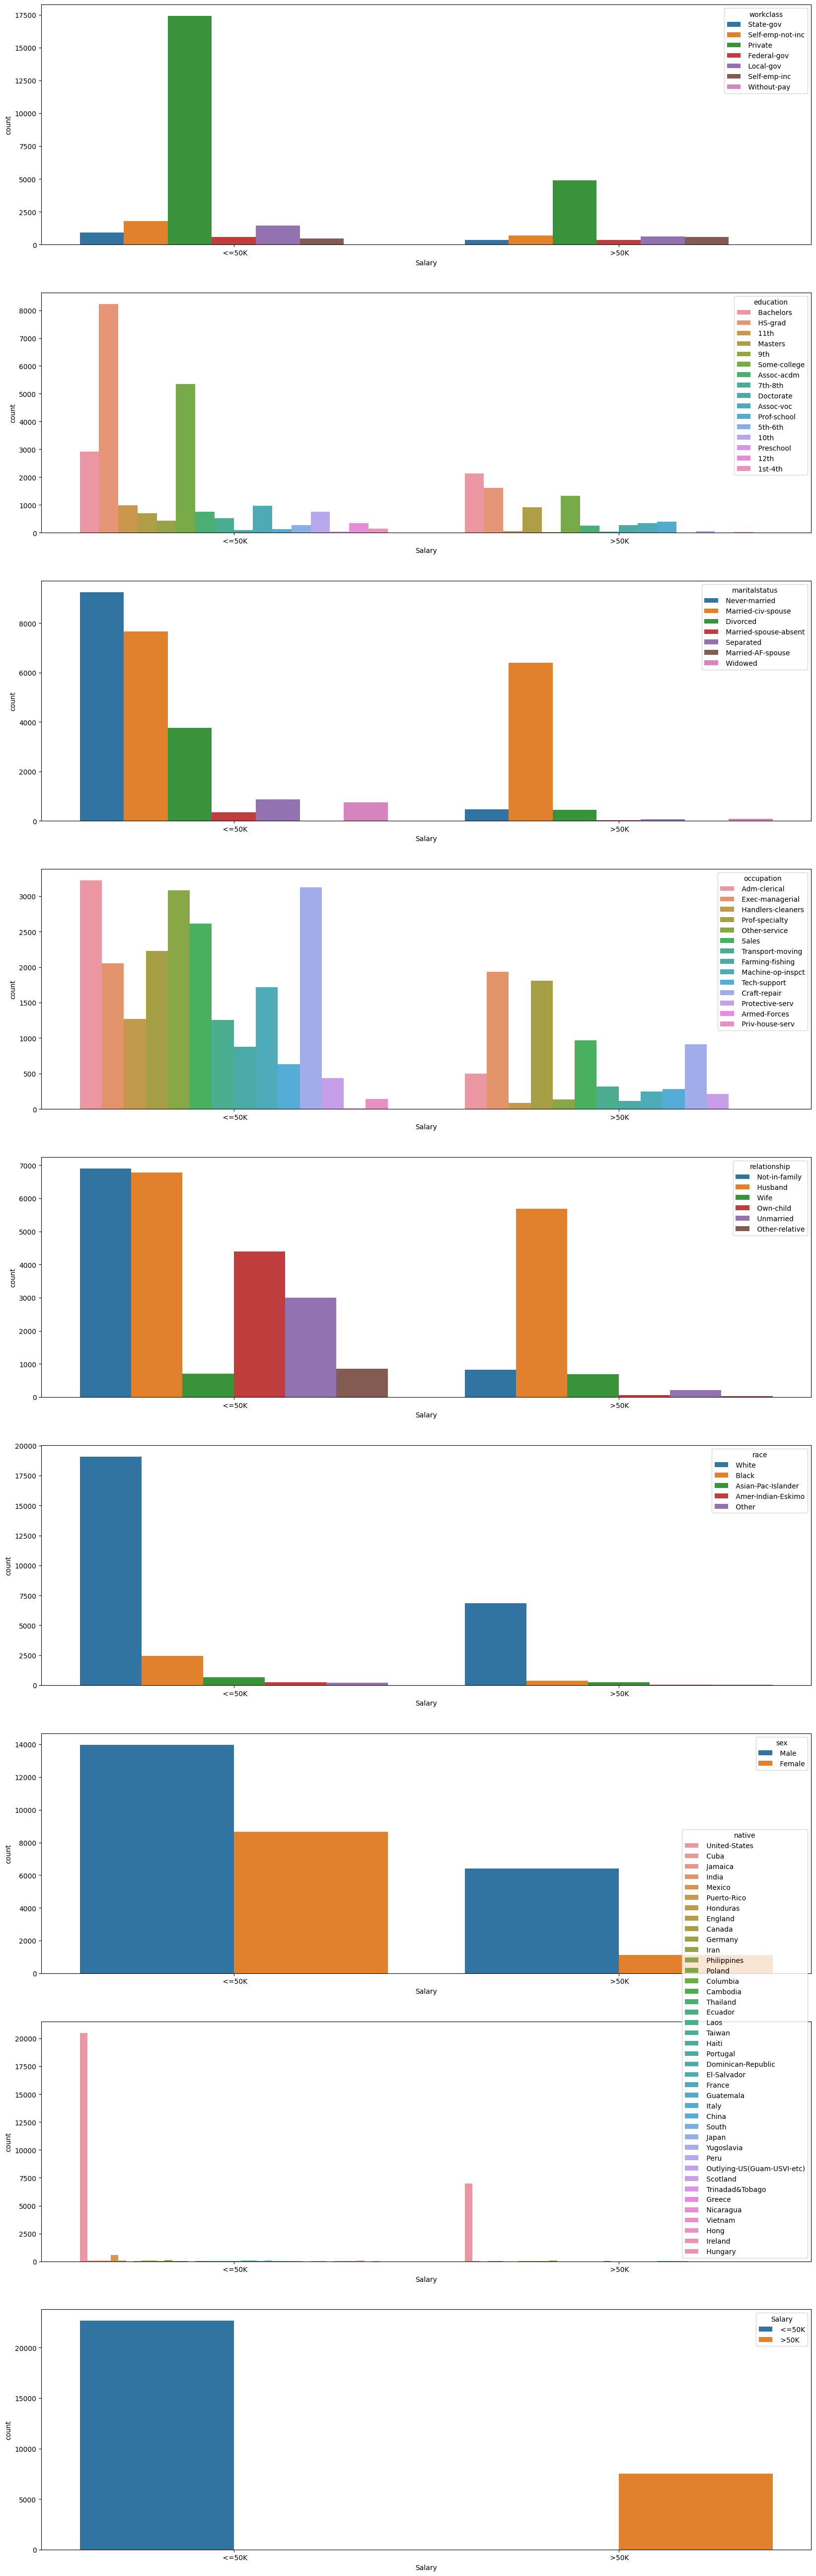

In [22]:
counter=1;


plt.figure(figsize=(20,300))
for column in categorical_col:
    plt.subplot(40,1,counter)
    counter=counter+1
    sns.countplot(x='Salary',hue=column,data=df)

# Let’s discuss our findings from above graphs.

· Private Work class is majorly earning Income <=50K
· Education qualification of HS-grad have income <=50K
· Married-civ-spouse have >50K income as compared to other marital status
· Husbands are the major earning members as compared to other relations
· Majority of the Income earning race is White
· Majority of females have income <=50K
· Data in Income (target variable) is highly unbalanced
Before visualizing above graphs, we said observing target variable is important, let’s discuss it now.
From the above findings, we saw data in ‘Income’ column is highly unbalanced. Does this mean
anything for us? Will this affect the model building later on?
Yes, this is the most important observation for us. The data is highly unbalanced because we
have more than 25000 records for the income of <=50K and only 8000 records for the income of
>=50K. If we train our prediction model for the dataset in this current situation, then it will be
highly biased towards income <=50K. We can fix this before building our model using certain
python libraries specifically designed for this purpose. So, let’s move forward as we will fix this in
the Model Building Section

# Feature Engneering

In [23]:
for feature in categorical_col:
    print(df[feature].value_counts())
    print("\n \n ")

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

 
 
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

 
 
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

 
 
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales            

In [24]:
pd.crosstab(df['occupation'],df['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,3223,498
Armed-Forces,8,1
Craft-repair,3122,908
Exec-managerial,2055,1937
Farming-fishing,874,115
Handlers-cleaners,1267,83
Machine-op-inspct,1720,245
Other-service,3080,132
Priv-house-serv,142,1


In [25]:
pd.crosstab(df['workclass'],df['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,578,365
Local-gov,1458,609
Private,17409,4876
Self-emp-inc,474,600
Self-emp-not-inc,1785,714
State-gov,935,344
Without-pay,14,0


In [26]:
pd.crosstab(df['workclass'],df['occupation'])

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,
Federal-gov,316,9,63,179,8,22,14,34,0,167,27,14,66,24
Local-gov,281,0,143,212,29,46,11,189,0,692,304,7,38,115
Private,2793,0,3146,2647,450,1255,1881,2665,143,2254,186,2895,723,1247
Self-emp-inc,28,0,99,385,51,2,10,27,0,157,5,281,3,26
Self-emp-not-inc,49,0,523,383,430,15,35,173,0,365,6,376,26,118
State-gov,251,0,55,186,15,9,13,123,0,403,116,11,56,41
Without-pay,3,0,1,0,6,1,1,1,0,0,0,0,0,1


<Axes: xlabel='occupation'>

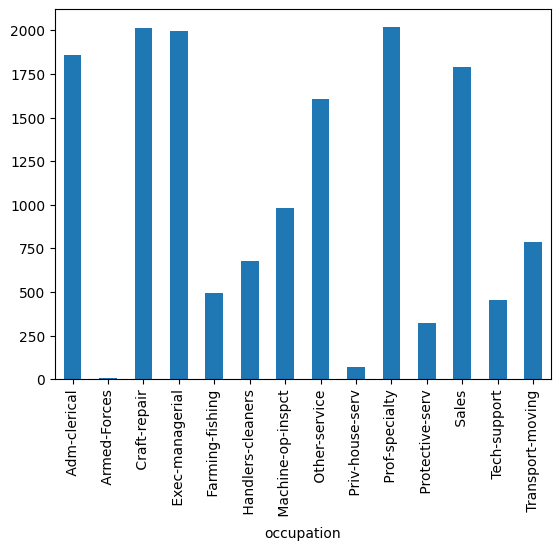

In [27]:
pd.crosstab(df['Salary'],df['occupation']).mean().plot(kind='bar')

Putting records of workclass into bins private sector, govt sector, Unemployed for
better visualization

In [28]:
 df["workclass"].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [29]:
df["workclass"].replace(["Private","Self-emp-not-inc","Self-emp-inc"], 'PrivateSector',inplace = True, regex = True )
df["workclass"].replace(["State-gov",'Federal-gov','Local-gov'], 'GovtSector',inplace = True, regex = True )
df["workclass"].replace(["Without-pay","Never-worked"],'Unemployed',inplace =True, regex = True )

In [30]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,GovtSector,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,PrivateSector,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,PrivateSector,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,PrivateSector,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,PrivateSector,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,PrivateSector,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,PrivateSector,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,PrivateSector,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,PrivateSector,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<Axes: xlabel='workclass'>

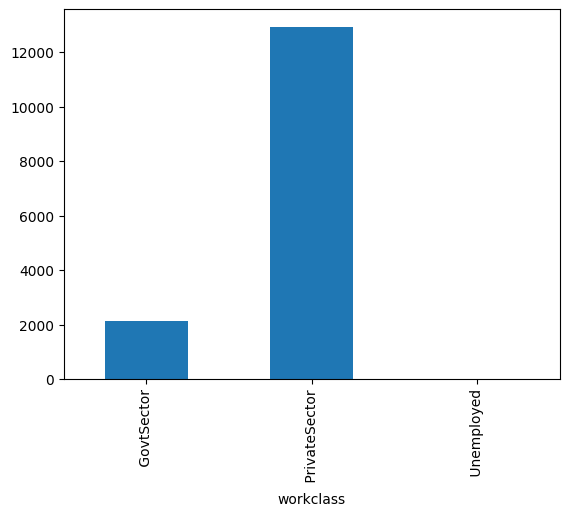

In [31]:
pd.crosstab(df['Salary'],df['workclass']).mean().plot(kind='bar')

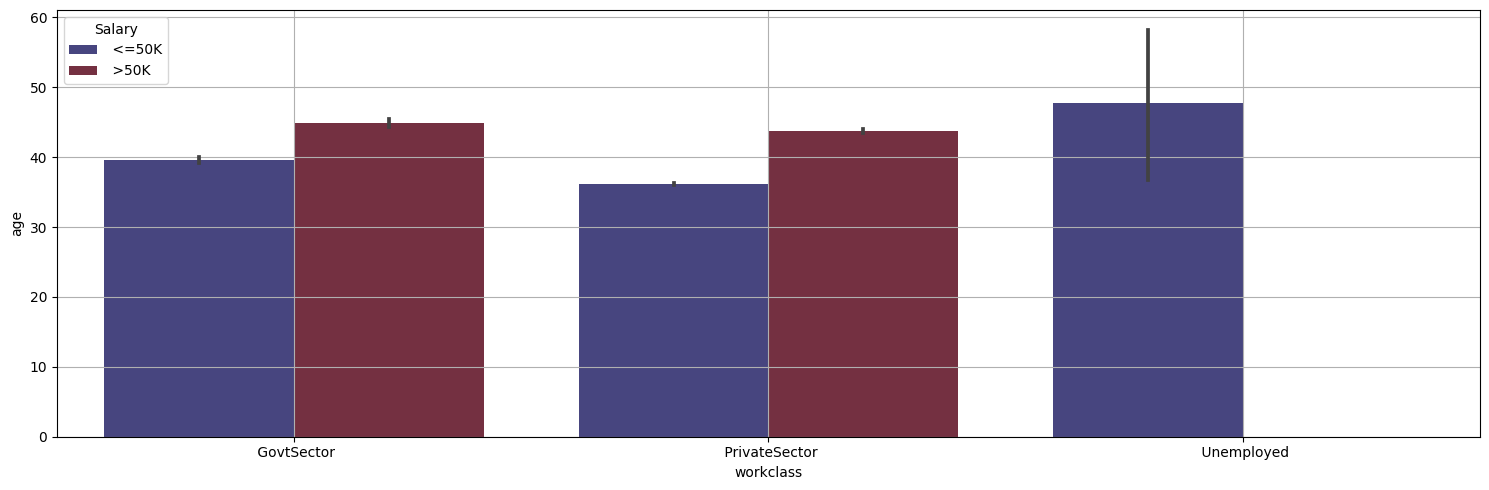

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(x=df["workclass"],y='age',hue='Salary',data=df,palette='icefire',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()


# Observation

1.People earning more then 50K are older in age compare to people earning less
then 50K and Unemployed
2.People working in govt sector seem to be having slighter more income compared to private sector.

# Putting education into bins for better visualisation

In [33]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [34]:
df["education"].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School',inplace = True , regex = True)
df["education"].replace(['HS-grad'],'High School', inplace = True , regex =True)
df["education"].replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'Others',inplace = True , regex = True)

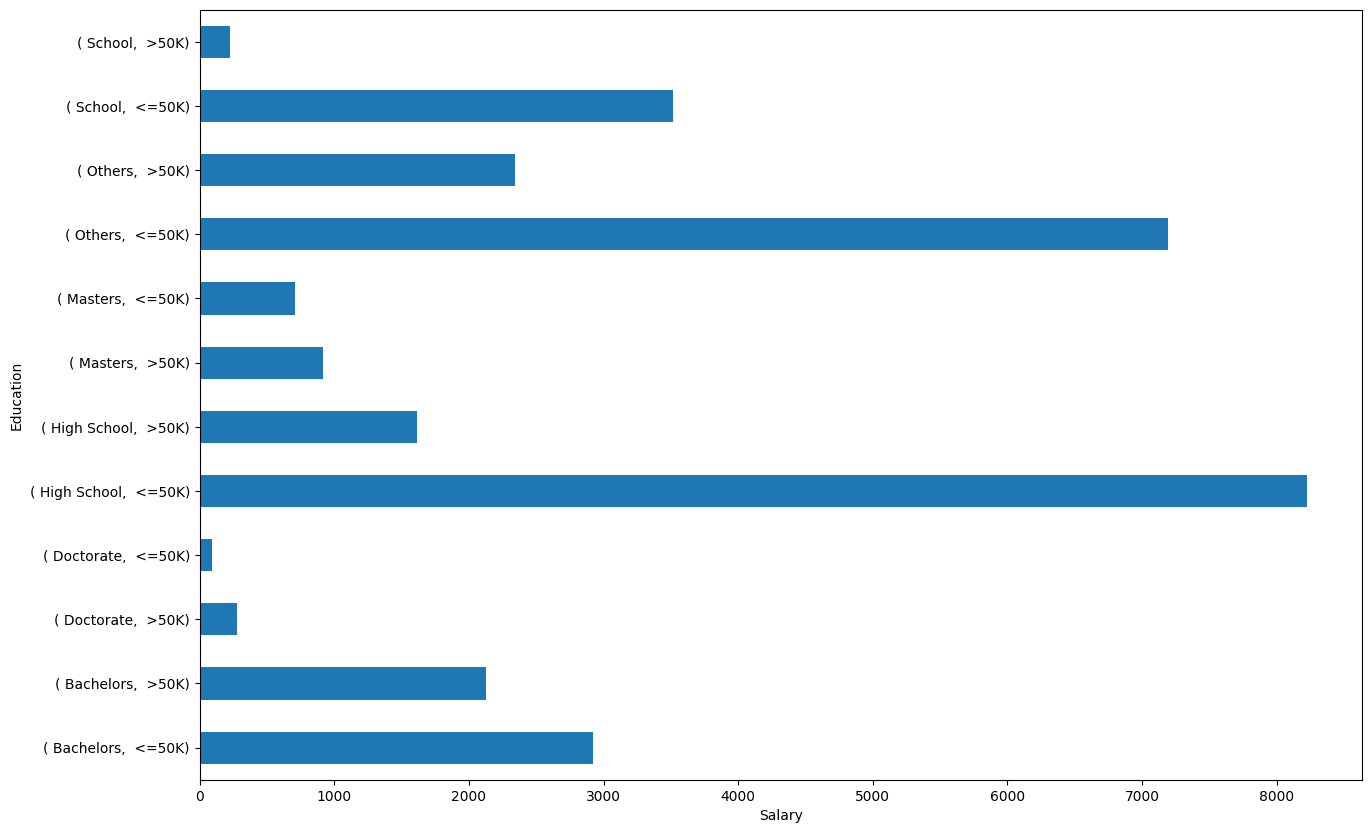

In [35]:
plt.figure(figsize = (15,10))
df.groupby('education')['Salary'].value_counts().plot(kind = 'barh')
plt.xticks(rotation = 0)
plt.xlabel("Salary")
plt.ylabel('Education')
plt.show()

# Observation

1.In this dataset, number of people earning more then 50K in school are almost
same compare to number of people earning same amount in there Doctorate
2.Maximum people who are earning less then 50k are in high school
3.Maximum people who are earning more then 50k are in others category

# Putting Maritalstatus into bins for better visualisation

In [36]:
#martial status
df['maritalstatus'].replace(['Married-civ-spouse', 'Married-AF-spouse'],'married' , inplace = True , regex = True)
df['maritalstatus'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'], 'other' , inplace = True ,regex = True)

In [37]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,GovtSector,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,PrivateSector,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,PrivateSector,High School,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,PrivateSector,School,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,PrivateSector,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,PrivateSector,Others,12,married,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,PrivateSector,High School,9,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,PrivateSector,High School,9,other,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,PrivateSector,High School,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<Axes: xlabel='maritalstatus'>

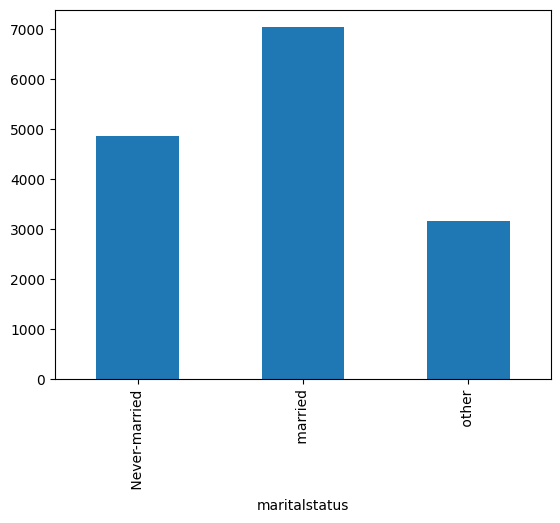

In [38]:
pd.crosstab(df['Salary'],df['maritalstatus']).mean().plot(kind='bar')

<Axes: xlabel='maritalstatus', ylabel='count'>

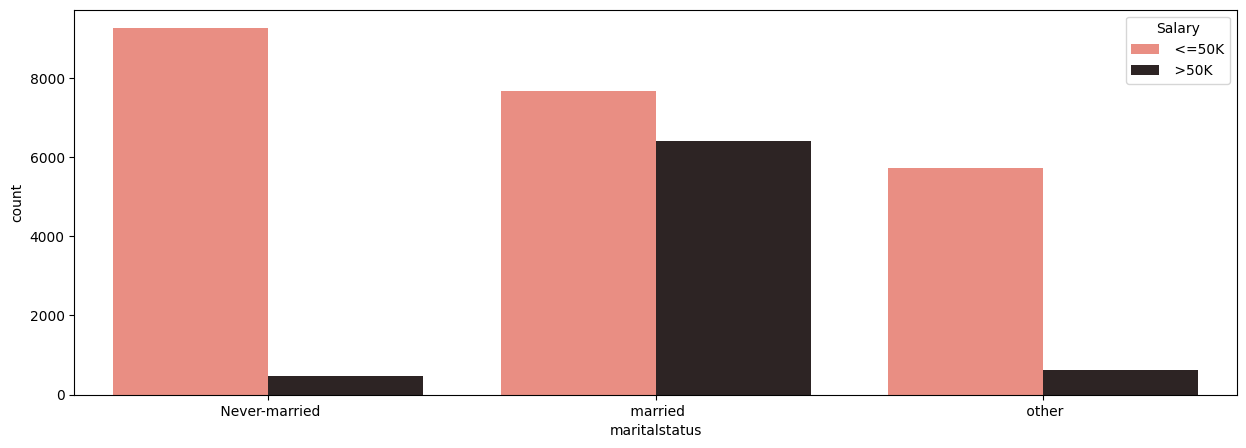

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(x = "maritalstatus", hue = 'Salary', data = df, palette = "dark:salmon_r")

# Observation

1.More number of married person having salary more than 50k
2.More number never married and other having salary less than 50k

# More males are earning or females

<Axes: xlabel='sex', ylabel='count'>

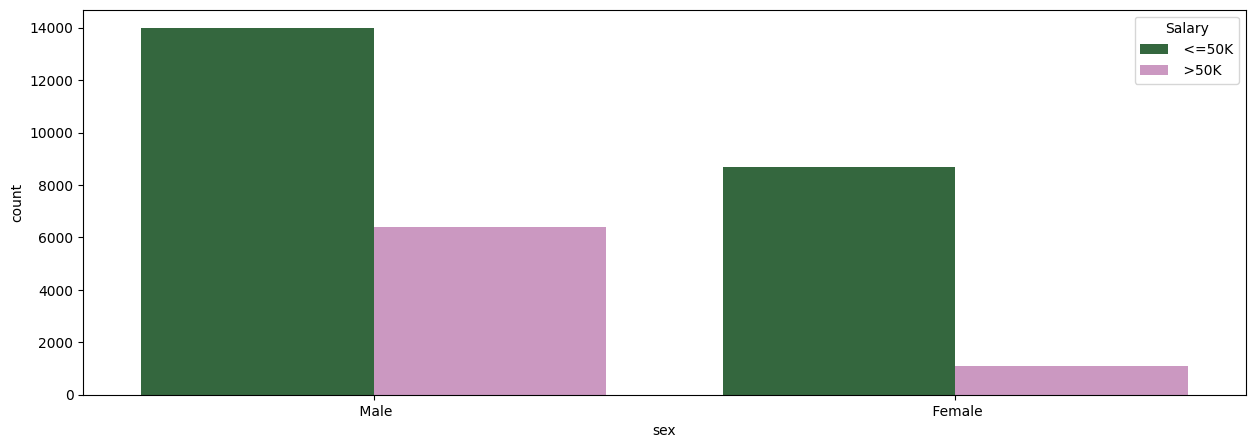

In [40]:
# Males earn comparitively more then $50K as compared ot their females counterpart.
plt.figure(figsize=(15,5))
sns.countplot(x = "sex",hue = "Salary", data = df, palette = "cubehelix")

# Race

<Axes: xlabel='race', ylabel='count'>

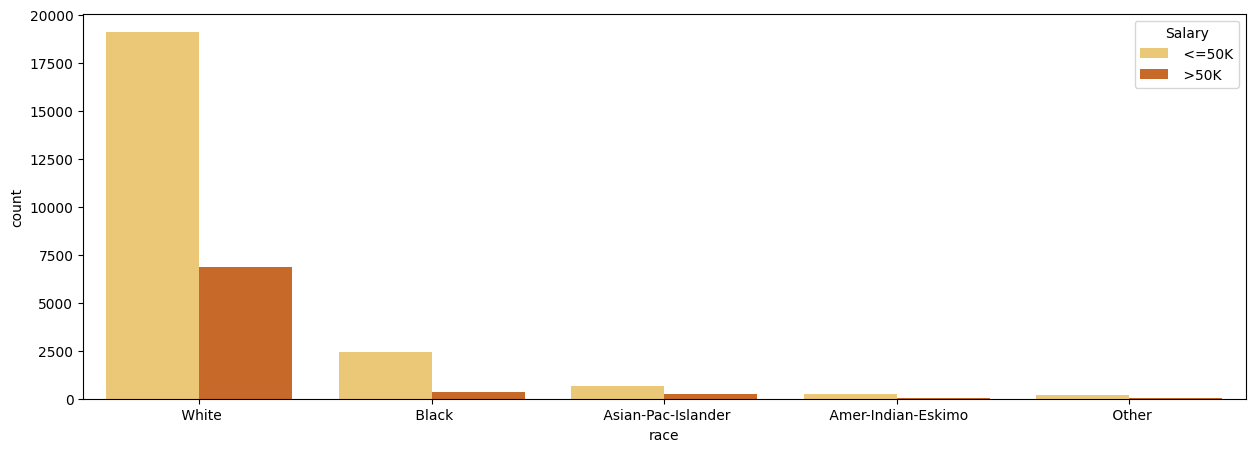

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(x='race', hue='Salary', data=df,palette="YlOrBr")

# Relationship

<Axes: xlabel='relationship', ylabel='count'>

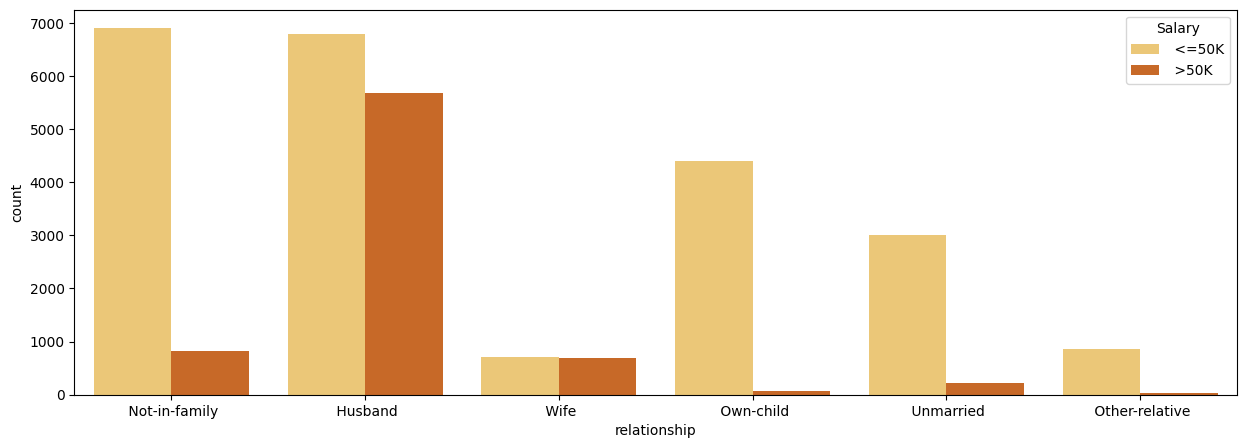

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(x='relationship', hue='Salary', data=df,palette="YlOrBr")

# Occupation

<Axes: xlabel='occupation', ylabel='count'>

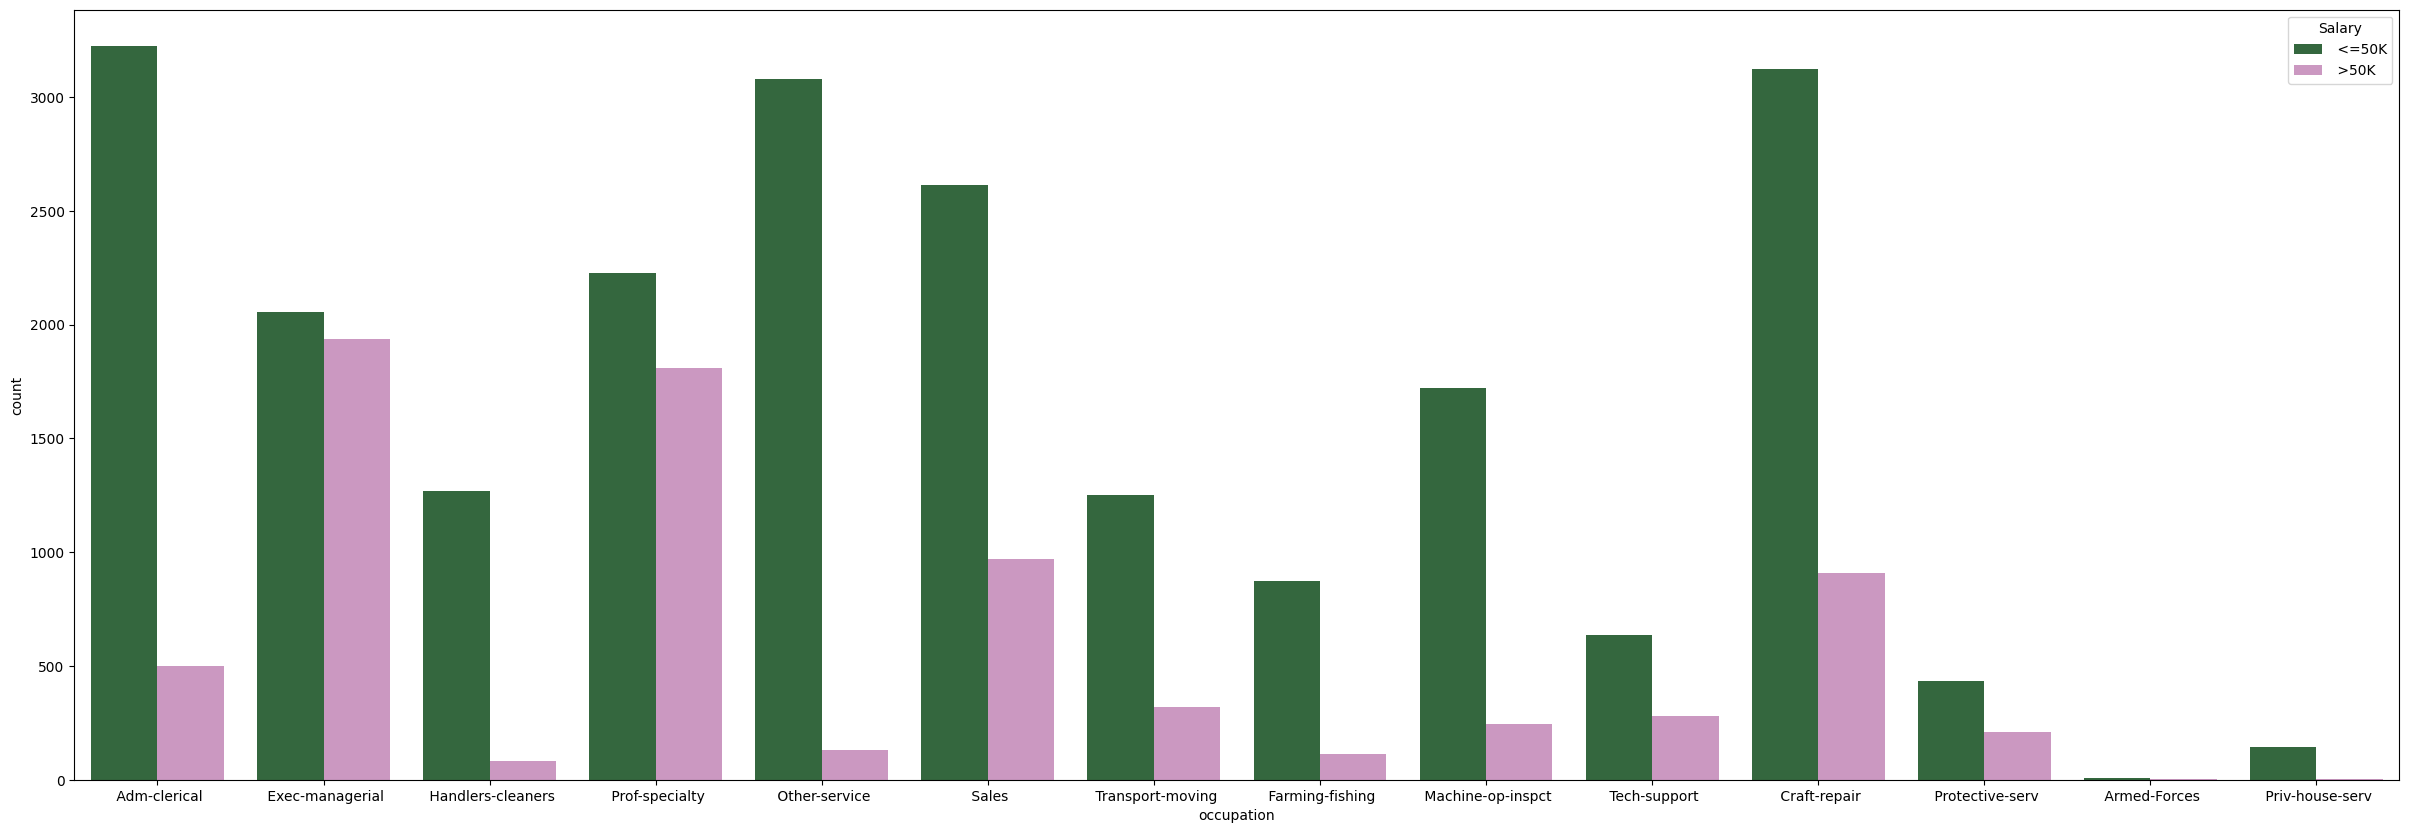

In [43]:
plt.figure(figsize=(30,10))
sns.countplot(x='occupation', hue='Salary', data=df,palette="cubehelix")

# Maximum number of records are from which country

In [44]:
 #The datset mostly contains income data of the people belonging to United States.
df['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

<Axes: xlabel='native', ylabel='count'>

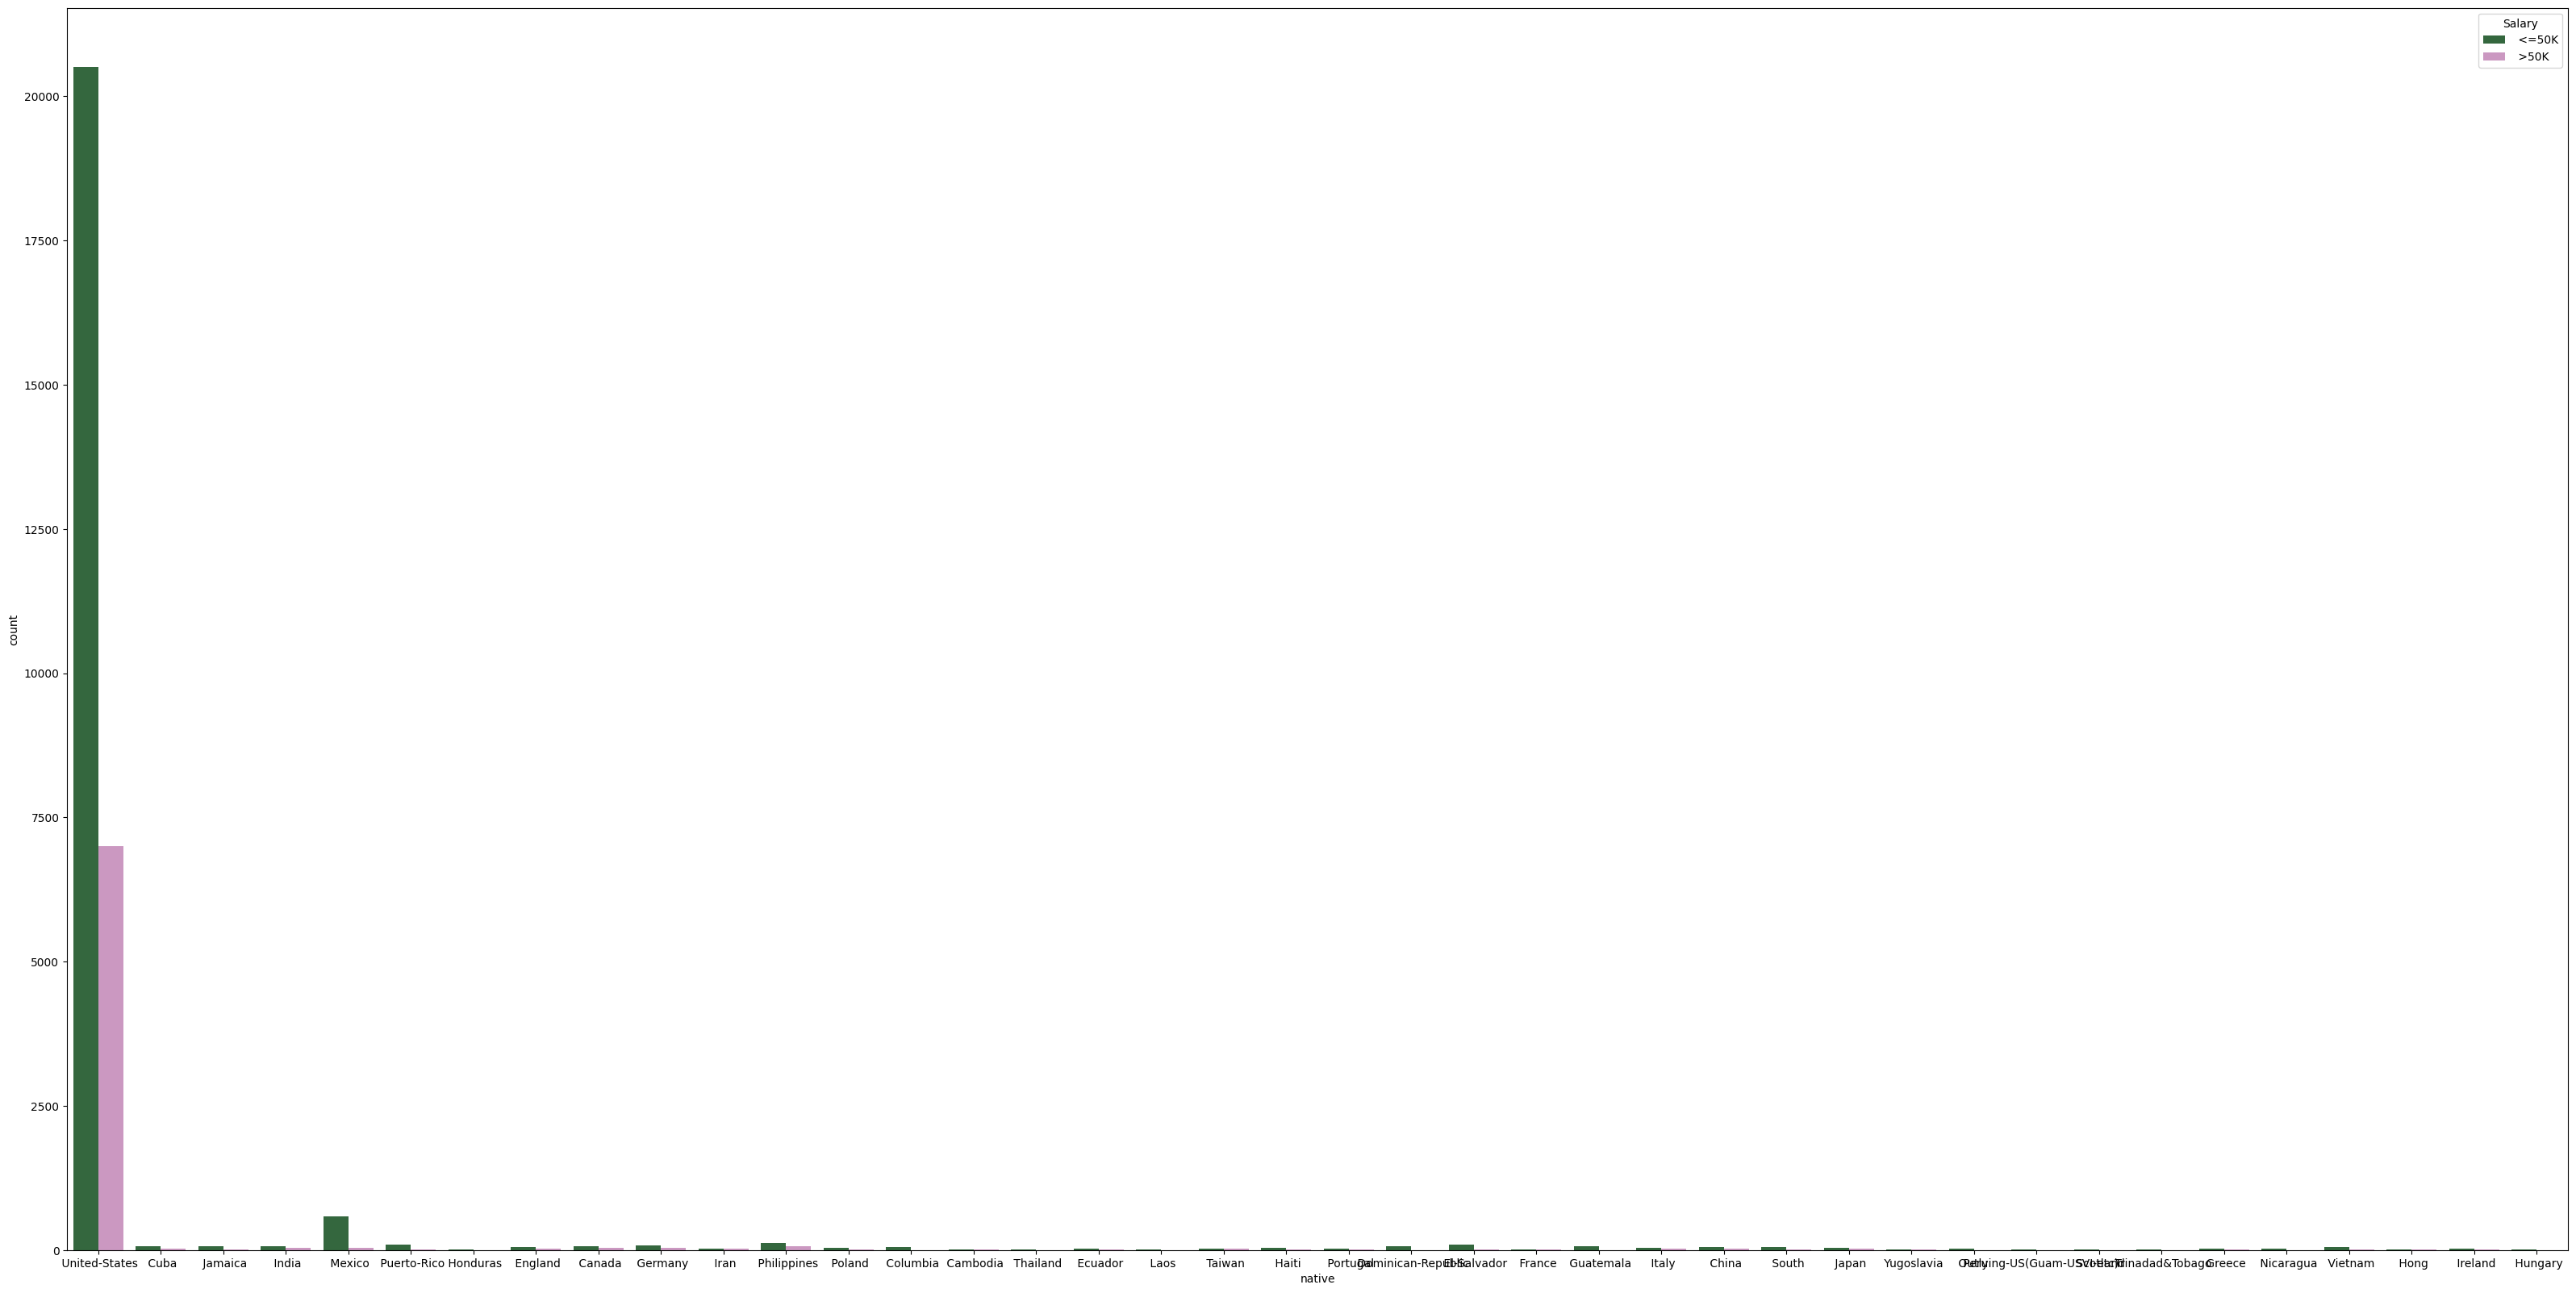

In [45]:
 plt.figure(figsize=(40,20))
sns.countplot(x='native', hue='Salary', data=df,palette="cubehelix")

In [46]:
#native
df['native'].replace(['United-States'], 'USA' , inplace = True , regex = True)
df['native'].replace([ ' Cuba', ' Jamaica', ' India', ' Mexico',
' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
' Hungary'], 'other' , inplace = True , regex = True)

In [47]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# Check the outliers

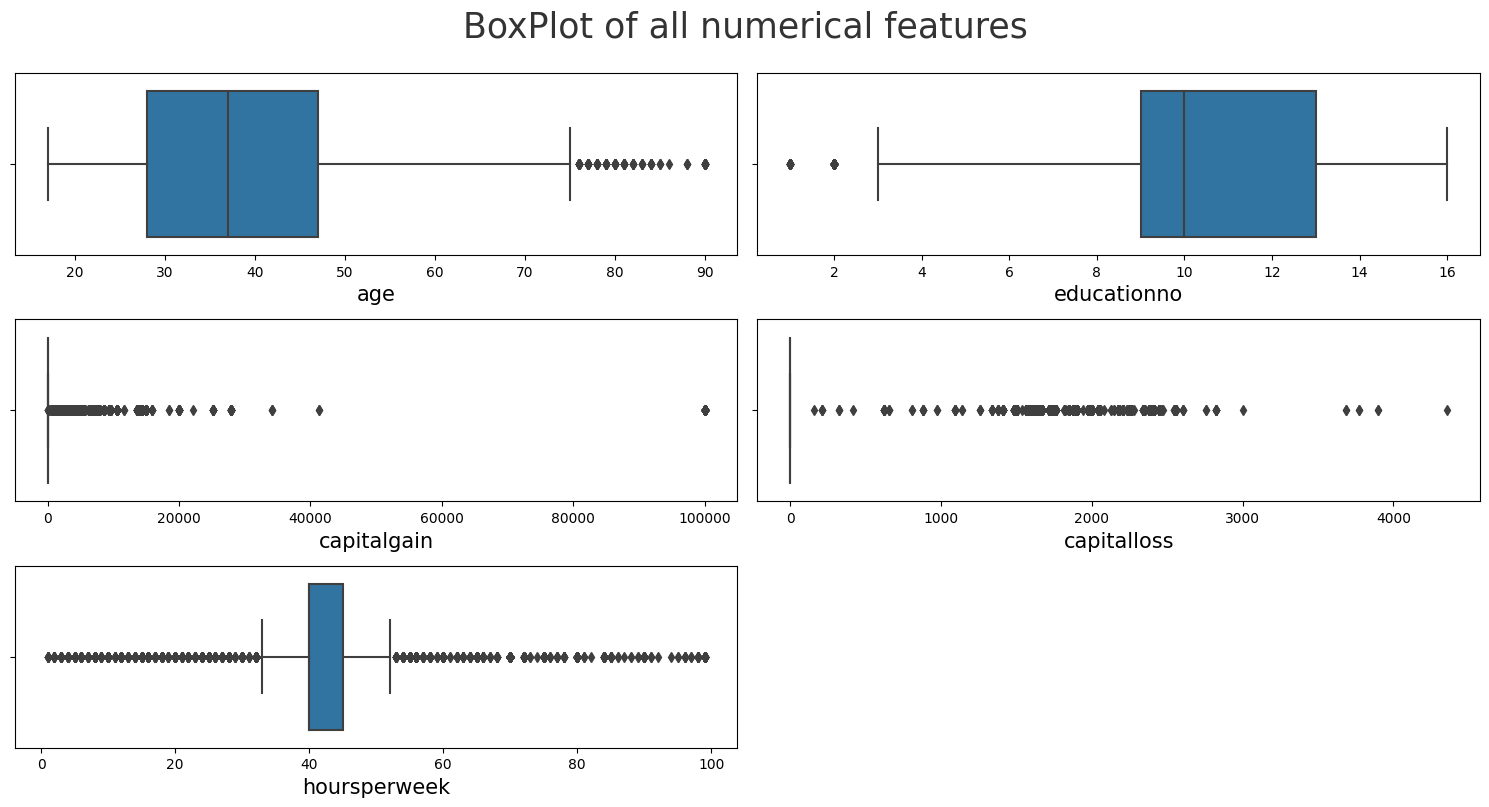

In [48]:
plt.figure(figsize = (15,10))
plt.suptitle('BoxPlot of all numerical features', fontsize = 25, alpha = 0.8, y= 1.)
for i in range(0, len(numerical_col)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x= df[numerical_col[i]], data = df)
    plt.xlabel(numerical_col[i],fontsize = 15)
#plt.ylabel("Classes")
#plt.title("{} .format(data.columns[i]))
    plt.tight_layout()

In [49]:
## code to plot 4 graph together
## not useful right now
def create_comparison_plot(df,df1,column):
    #comparing  
    
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])
    
    
    plt.subplot(2,2,2)
    sns.boxplot(df[column])
    
    
    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()


# From above Distribution plot Skewness treatment required:-

1. We now proceed with treating skewness in our data, which allows us to fit our data in a
symmetric distribution, which further allows our model to learn better.
2. We treat ‘education no’, ‘Capital_gain’ and ‘Capital_loss’ column for skewness, and use
square-root transform and cube-root transform methods (since we cannot apply log and boxcox transform to columns where 0 values are present).
32
3. The final skewness that we receive after multiple transformations (sqrt transform for Fnlwgt
column, and cbrt transform for Capital_gain and Capital_loss columns twice).

In [50]:
df.skew()

age              0.530180
educationno     -0.305378
capitalgain     11.902483
capitalloss      4.528238
hoursperweek     0.330856
dtype: float64

In [51]:
df[numerical_col]=power_transform(df[numerical_col])

In [52]:
df.skew()

age            -0.015980
educationno     0.026665
capitalgain     2.996087
capitalloss     4.266405
hoursperweek    0.235762
dtype: float64

# Handling the outliers

# 1 . Age

<Axes: xlabel='age'>

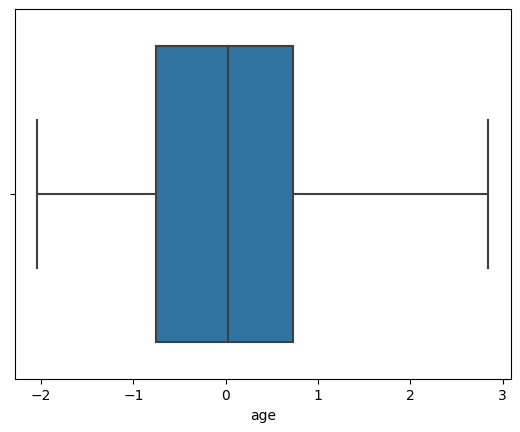

In [53]:
sns.boxplot(x = 'age', data = df)

In [54]:
## Handling the outliers
#IQR = df['age'].quantile(0.75) - df['age'].quantile(0.25)
#Lower_Limit = df['age'].quantile(0.25) - 1.5*IQR
#UPPER_LIMIT = df['age'].quantile(0.75) + 1.5*IQR
#df['age']= np.where(df['age']>UPPER_LIMIT,UPPER_LIMIT,
# np.where(df['age']<Lower_Limit,Lower_Limit,df['age']))

# 2 .  hours_per_week

<Axes: xlabel='hoursperweek'>

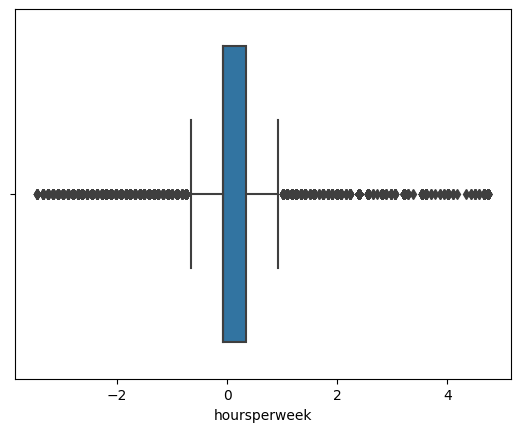

In [55]:
sns.boxplot(x = 'hoursperweek', data = df)

In [56]:
IQR = df['hoursperweek'].quantile(0.75) - df['hoursperweek'].quantile(0.25)
Lower_Limit = df['hoursperweek'].quantile(0.25) - 1.5*IQR
UPPER_LIMIT = df['hoursperweek'].quantile(0.75) + 1.5*IQR

df['hoursperweek']= np.where(df['hoursperweek']>UPPER_LIMIT,UPPER_LIMIT,
np.where(df['hoursperweek']<Lower_Limit,Lower_Limit,df['hoursperweek']))

<Axes: xlabel='hoursperweek'>

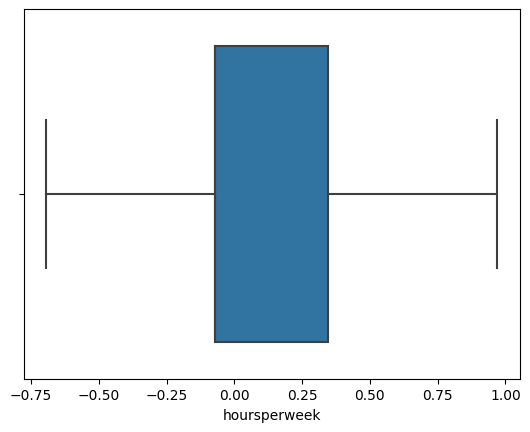

In [57]:
sns.boxplot(x = 'hoursperweek', data = df)

# Feature engineering on test data

In [58]:
#Workclass
df_test["workclass"].replace(["Private","Self-emp-not-inc","Self-emp-inc"],'Private Sector',inplace = True, regex = True )
df_test["workclass"].replace(["State-gov",'Federal-gov','Local-gov'], 'GovtSector',inplace = True, regex = True )
df_test["workclass"].replace(["Without-pay","Never-worked"],'Unemployed',inplace = True, regex =True )



#Education
df_test["education"].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School',inplace = True , regex = True)
df_test["education"].replace(['HS-grad'],'High School', inplace = True , regex= True)
df_test["education"].replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'Others',inplace = True , regex = True)


#martial status
df_test['maritalstatus'].replace(['Married-civ-spouse', 'Married-AF-spouse'],'married' , inplace = True , regex = True)
df_test['maritalstatus'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'], 'other' , inplace = True ,regex = True)



#native
df_test['native'].replace(['United-States'], 'USA' , inplace = True , regex =True)
df_test['native'].replace([ ' Cuba', ' Jamaica', ' India', ' Mexico',
' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
' Hungary'], 'other' , inplace = True , regex = True)



## Handling the outliers in age
IQR = df_test['age'].quantile(0.75) - df_test['age'].quantile(0.25)
Lower_Limit = df_test['age'].quantile(0.25) - 1.5*IQR
UPPER_LIMIT = df_test['age'].quantile(0.75) + 1.5*IQR


df_test['age']= np.where(df_test['age']>UPPER_LIMIT,UPPER_LIMIT,
np.where(df_test['age']<Lower_Limit,Lower_Limit,df_test['age']))

## Handling the outliers in hoursperweek
IQR = df_test['hoursperweek'].quantile(0.75) - df_test['hoursperweek'].quantile(0.25)
Lower_Limit = df_test['hoursperweek'].quantile(0.25) - 1.5*IQR
UPPER_LIMIT = df_test['hoursperweek'].quantile(0.75) + 1.5*IQR


df_test['hoursperweek']= np.where(df_test['hoursperweek']>UPPER_LIMIT,UPPER_LIMIT,
np.where(df_test['hoursperweek']<Lower_Limit,Lower_Limit,df_test['hoursperweek']))


# Encoding

In [59]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

# OHE/pd.get_dummies and Label encoder

• If the data of feature is continous or discrete (numbers) then we dont have to do anything
and we can directly standardize and train the model.
• But when the data is categorical (string) then we have to perform encoding, it means convert
it to 0 or 1, then only we can train the model.
• Use OHE for the cat_data which have nominal classes and minimal classes pd.get_dummies
is convienient to use then the OHE both are do same function
• Use label encoder for target variable and for the ordinal data label encoder assign values 123
for the multi classes then model gives weightage to the higher number

In [60]:
column1 = ["workclass","maritalstatus","relationship","race","sex","native"]
column2=["education","occupation","Salary"]

In [61]:
#applying label encoder for column 2 for both test and train data
le=LabelEncoder()
for i in column2:
    df[i]=le.fit_transform(df[i])
    df_test[i]=le.fit_transform(df_test[i])
    
    
    
    
    
    
#applying pd.getdummies for column 1 for both test and train data
df=pd.get_dummies(df,columns=column1, drop_first=True)
df_test=pd.get_dummies(df_test,columns=column1, drop_first=True)    


# Standaridizing Scaler:-

• Use StandardScaler if you want each feature to have zero-mean, unit standard-deviation. If
you want more normally distributed data, and are okay with transforming your data. Check
out scikit-learn’s QuantileTransformer(output_distribution=‘normal’).
• Use MinMaxScaler if you want to have a light touch. It’s non-distorting.
• You could use RobustScaler if you have outliers and want to reduce their influence.
• Use Normalizer sparingly — it normalizes sample rows, not feature columns. It can use l2 or
l1 normalization

In [62]:
numerical_col

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [63]:
#scaling for only numerical columns for both train and test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in numerical_col:
    df[[i]]=sc.fit_transform(df[[i]])
    df_test[[i]]=sc.fit_transform(df_test[[i]])

# Divinding data into X_train,X_test,y_train,y_test

In [64]:
df

,age,education,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary,workclass_ PrivateSector,workclass_ Unemployed,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native_ USA,native_other
0,0.176790,0,1.157458,0,3.299003,-0.222769,-0.230389,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,0.921668,0,1.157458,3,-0.303117,-0.222769,-1.451121,0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,0.101151,2,-0.482673,5,-0.303117,-0.222769,-0.230389,0,1,0,...,0,0,0,0,0,0,1,1,1,0
3,1.102040,5,-1.224113,5,-0.303117,-0.222769,-0.230389,0,1,0,...,0,0,0,0,1,0,0,1,1,0
4,-0.757093,0,1.157458,9,-0.303117,-0.222769,-0.230389,0,1,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.855542,4,0.729615,12,-0.303117,-0.222769,-0.557100,0,1,0,...,0,0,1,0,0,0,1,0,1,0
30157,0.250917,2,-0.482673,6,-0.303117,-0.222769,-0.230389,1,1,0,...,0,0,0,0,0,0,1,1,1,0
30158,1.385433,2,-0.482673,0,-0.303117,-0.222769,-0.230389,0,1,0,...,0,1,0,0,0,0,1,0,1,0
30159,-1.395269,2,-0.482673,0,-0.303117,-0.222769,-1.451121,0,1,0,...,1,0,0,0,0,0,1,1,1,0


In [65]:
df_test

,age,education,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Private Sector,workclass_ Unemployed,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native_ USA,native_other
0,-1.032475,5,-1.216563,6,-0.145438,-0.219169,-0.230131,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,-0.056218,2,-0.434898,4,-0.145438,-0.219169,1.397681,0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,-0.807185,4,0.737599,10,-0.145438,-0.219169,-0.230131,1,0,0,...,0,0,0,0,0,0,1,1,1,0
3,0.394363,4,-0.044066,6,0.852624,-0.219169,-0.230131,1,1,0,...,0,0,0,0,1,0,0,1,1,0
4,-0.356605,5,-1.607395,7,-0.145438,-0.219169,-1.450991,0,1,0,...,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.431702,0,1.128431,9,-0.145438,-0.219169,-0.230131,0,1,0,...,1,0,0,0,0,0,1,1,1,0
15056,0.018879,0,1.128431,9,-0.145438,-0.219169,-0.881256,0,1,0,...,0,0,0,0,0,0,1,0,1,0
15057,-0.056218,0,1.128431,9,-0.145438,-0.219169,1.397681,0,1,0,...,0,0,0,0,0,0,1,1,1,0
15058,0.394363,0,1.128431,0,0.562734,-0.219169,-0.230131,0,1,0,...,1,0,0,1,0,0,0,1,1,0


In [66]:
X_train=df.drop('Salary',axis=1)
X_test=df_test.drop('Salary',axis=1)
y_train=df['Salary']
y_test=df_test['Salary']

In [67]:
pip install imblearn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [68]:
from imblearn.over_sampling import SMOTE

print("Before Oversampling '1': {}".format(sum(y_train == 1)))
print("Before Oversampling '0': {} \n".format(sum(y_train == 0)))

sm=SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("After OverSampling '1': {}".format(sum (y_train_res == 1)))
print("After OverSampling '0': {}".format(sum (y_train_res == 0)))

Before Oversampling '1': 7508
Before Oversampling '0': 22653 

After OverSampling '1': 22653
After OverSampling '0': 22653


# Random under sampling

In [69]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


ran_un_sam = RandomUnderSampler(random_state=42)


X_train_under,y_train_under = ran_un_sam.fit_resample(X_train,y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_under)))

Original dataset shape Counter({0: 22653, 1: 7508})
Resampled dataset shape Counter({0: 7508, 1: 7508})


# Combining Both Random Sampling Techniques

Combining both random sampling methods can occasionally result in overall improved performance
in comparison to the methods being performed in isolation.
The concept is that we can apply a modest amount of oversampling to the minority class, which
improves the bias to the minority class examples, whilst we also perform a modest amount of
undersampling on the majority class to reduce the bias on the majority class examples.
To implement this in Python, leveraging the imbalanced-learn framework, we may the sampling_strategy attribute in our oversampling and undersampling techniques.

In [70]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)


# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X_train, y_train)
print(f"Oversampled: {Counter(y_over)}")
Oversampled: Counter({0: 9844, 1: 4922})

    
    # now to comine under sampling
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_combined_sampling)))

Oversampled: Counter({0: 22653, 1: 11326})
Original dataset shape Counter({0: 22653, 1: 7508})
Resampled dataset shape Counter({0: 14157, 1: 11326})


# Model Building for imbalanced data

In [71]:
#import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report, accuracy_score, precision_score,recall_score,roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [72]:
#to store n present all info at the end
i_Report =[]

# Baseline Model : Support Vector Classifier(SVC)

In [73]:
model1 = SVC()
model1

SVC()

In [74]:
model1.fit(X_train,y_train)

SVC()

In [75]:
test_score = model1.score(X_test,y_test)
pred = model1.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('confusion_matrix\n',confusion_matrix(y_test,pred))
print('classification_report\n',classification_report(y_test,pred))
p,r,f,s = precision_recall_fscore_support(y_test,pred,average='macro')
# precision,recall, f1-score




roc = roc_auc_score(y_test,pred)

print(f"1. Accuracy: {accuracy}\n2. ROC : {roc}")
i_Report.append(['SVC Classifier',p,r,f,accuracy,roc])

confusion_matrix
 [[10684   676]
 [ 1960  1740]]
classification_report
               precision    recall  f1-score   support

           0       0.84      0.94      0.89     11360
           1       0.72      0.47      0.57      3700

    accuracy                           0.82     15060
   macro avg       0.78      0.71      0.73     15060
weighted avg       0.81      0.82      0.81     15060

1. Accuracy: 0.8249667994687915
2. ROC : 0.7053816140083746


# SVC Hypertuned

In [77]:
kfold = KFold(n_splits= 5 , shuffle = True, random_state = 42)
param_grid = {'C':[1,10],'gamma':[1,0.1],'kernel':['linear']}


grid = GridSearchCV(estimator = SVC(),
                 param_grid= param_grid, 
cv = kfold,
refit = True,
verbose = 2)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  25.4s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  25.9s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  25.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  24.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  25.5s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  24.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  24.9s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  26.7s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  24.5s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  30.7s
[CV] END .......................C=10, gamma=1, kernel=linear; total time= 1.1min
[CV] END .......................C=10, gamma=1, ke

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1, 0.1], 'kernel': ['linear']},
             verbose=2)

In [78]:
cv_score = grid.best_score_
g_pred = grid.predict(X_test)
cv_accuracy = accuracy_score(y_test,g_pred)
cm = confusion_matrix(y_test,g_pred)
print(cm)

print(classification_report(y_test,g_pred))

p,r,f,s = precision_recall_fscore_support(y_test,g_pred,average = 'macro')

roc = roc_auc_score(y_test,g_pred)

print(f"1. Accuracy: {cv_accuracy}\n2. ROC : {roc}")
i_Report.append(['SVC Classifier Hypertuned Regression',p,r,f,cv_accuracy,roc])

[[10645   715]
 [ 1857  1843]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11360
           1       0.72      0.50      0.59      3700

    accuracy                           0.83     15060
   macro avg       0.79      0.72      0.74     15060
weighted avg       0.82      0.83      0.82     15060

1. Accuracy: 0.8292164674634794
2. ROC : 0.7175839836315188


# Model Building for Balanced data

In [79]:
model3 = SVC()
model3

SVC()

In [80]:
model3.fit(X_combined_sampling,y_combined_sampling)

SVC()

In [81]:
m4_test_score = model3.score(X_test,y_test)
m4_red = model3.predict(X_test)
m4_accuracy = accuracy_score(y_test,m4_red)
print('confusion_matrix\n',confusion_matrix(y_test,m4_red))
print('classification_report\n',classification_report(y_test,m4_red))
p,r,f,s = precision_recall_fscore_support(y_test,m4_red,average='macro')


#precision,recall,f1-score


m4_roc = roc_auc_score(y_test,m4_red)

print(f"1. Accuracy: {m4_accuracy}\n2. ROC : {m4_roc}")

confusion_matrix
 [[9018 2342]
 [ 758 2942]]
classification_report
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     11360
           1       0.56      0.80      0.65      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.79      0.75     15060
weighted avg       0.83      0.79      0.80     15060

1. Accuracy: 0.7941567065073041
2. ROC : 0.7944865816520746


In [82]:
i_Report.append(['Balanced SVC Classifier',p,r,f,m4_accuracy,m4_roc])

# Balanced SVC Classifier Hypertuned

In [83]:
kfold = KFold(n_splits= 5 , shuffle = True, random_state = 42)
param_grid = {'C':[1,10],'gamma':[1,0.1],'kernel':['linear']}
grid2 = GridSearchCV(estimator = SVC(),
param_grid= param_grid,
cv = kfold,
refit = True,
verbose = 2)
grid2.fit(X_combined_sampling,y_combined_sampling)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  19.1s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  19.6s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  20.6s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  19.3s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=  17.6s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  16.9s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  17.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  17.4s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  16.9s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  17.1s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=  43.6s
[CV] END .......................C=10, gamma=1, ke

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1, 0.1], 'kernel': ['linear']},
             verbose=2)

In [84]:
cv2_score = grid2.best_score_
g2_pred = grid2.predict(X_test)
cv2_accuracy = accuracy_score(y_test,g2_pred)
cm2 = confusion_matrix(y_test,g2_pred)
print(cm2)

print(classification_report(y_test,g2_pred))

p,r,f,s = precision_recall_fscore_support(y_test,g2_pred,average = 'macro')


roc2 = roc_auc_score(y_test,g2_pred)


print(f"1. Accuracy: {cv2_accuracy}\n2. ROC : {roc2}")

[[8929 2431]
 [ 691 3009]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85     11360
           1       0.55      0.81      0.66      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.80      0.75     15060
weighted avg       0.84      0.79      0.80     15060

1. Accuracy: 0.7926958831341302
2. ROC : 0.799623382185002


In [85]:
i_Report.append(['Balanced SVC Classifier Hypertuned',p,r,f,cv2_accuracy,roc2])

In [86]:
i_report_df = pd.DataFrame(i_Report,columns =(['Classifier','Macro_Precision','Macro_Rcall','Macro_F1','Accuracy',"ROC"]))
i_report_df.sort_values(by = ['Accuracy',],ascending = False, inplace = True)
i_report_df

,Classifier,Macro_Precision,Macro_Rcall,Macro_F1,Accuracy,ROC
1,SVC Classifier Hypertuned Regression,0.785974,0.717584,0.740610,0.829216,0.717584
0,SVC Classifier,0.782592,0.705382,0.729592,0.824967,0.705382
2,Balanced SVC Classifier,0.739619,0.794487,0.754136,0.794157,0.794487
3,Balanced SVC Classifier Hypertuned,0.740648,0.799623,0.754808,0.792696,0.799623
